In [2]:
import pandas as pd
import numpy as np
import os
import re
merchant_df = pd.read_parquet('../data/curated/final_merchant_statistics')

In [2]:
merchant_df.columns

Index(['merchant_abn', 'name', 'tags', 'tag', 'revenue_level', 'take_rate',
       'avg_monthly_rev', 'discounted_avg_monthly_rev', 'avg_monthly_orders',
       'avg_monthly_approximate_fraudulent_orders', 'std_monthly_revenue',
       'std_monthly_discounted_revenue', 'sales_revenue',
       'discounted_sales_revenue', 'num_orders',
       'approximate_fraudulent_orders', 'avg_daily_rev',
       'discounted_avg_daily_rev', 'avg_value_per_order',
       'discounted_avg_value_per_order', 'avg_daily_orders',
       'avg_daily_approximate_fraudulent_orders', 'std_daily_revenue',
       'std_daily_discounted_revenue', 'avg_daily_commission',
       'discounted_avg_daily_commission', 'avg_monthly_commission',
       'discounted_avg_monthly_commission', 'avg_commission_per_order',
       'discounted_avg_commission_per_order', 'overall_commission',
       'discounted_overall_commission', 'overall_fraud_rate',
       'sa2_region_count', 'median_customer_income', 'returning_customers',
       '

In [3]:
merchant_df.head()

,merchant_abn,name,tags,tag,revenue_level,take_rate,avg_monthly_rev,discounted_avg_monthly_rev,avg_monthly_orders,avg_monthly_approximate_fraudulent_orders,...,overall_commission,discounted_overall_commission,overall_fraud_rate,sa2_region_count,median_customer_income,returning_customers,unique_customers,mean_spending,std_spending,vip_customers
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",e,0.18,78141.967939,72828.912303,362.333333,24.013020,...,1265.899881,1179.828379,0.066273,1717.0,794.816023,11.0,3032.0,231.951752,155.424439,137.0
1,10346855916,Odio Institute,"((equipment, tool, furniture, and appliance r...","equipment, tool, furniture, and appliance ren...",b,3.57,752.797608,685.123931,0.666667,0.054709,...,241.873872,220.130319,0.082063,7.0,788.166667,0.0,6.0,1129.196413,717.988423,0.0
2,10385163239,Sed Et Company,"([florists supplies, nursery stock, and flower...","florists supplies, nursery stock, and flowers",a,6.61,2799.273678,2602.819654,8.222222,0.558488,...,1665.287911,1548.417412,0.067924,132.0,797.507171,0.0,73.0,345.115933,203.496326,3.0
3,10648956813,Proin Nisl Institute,"[(computeRs, computer peripheral equipment, an...","computers, computer peripheral equipment, and ...",a,6.66,157733.366350,147736.256945,2442.333333,154.456620,...,94545.379790,88553.112413,0.063241,2208.0,825.551750,1574.0,14380.0,98.720466,57.083817,710.0
4,10714068705,Sollicitudin Commodo Ipsum Industries,"([furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",c,2.51,48389.994518,45190.149050,382.000000,24.606550,...,10931.299762,10208.454670,0.064415,1715.0,796.782831,10.0,3221.0,135.209547,113.737044,145.0


In [4]:
Exposure:
-  'num_orders'
- 'sa2_region_count'
- 'returning_customers'
- 'unique_customers'

Risk of Default Payment
- 'median_customer_income'
- 'vip_customers'

Fraud
- 'discounted_sales_revenue'
- 'discounted_avg_daily_rev'
- 'approximate_fraudulent_orders'
- 'discounted_overall_commission'

Sales Performance
- 'avg_daily_rev'
- 'avg_daily_orders'
- 'avg_daily_commission'
- 'std_spending' 

     'take_rate',
       'sales_revenue', 'discounted_sales_revenue', 'num_orders',
       'approximate_fraudulent_orders', 'avg_daily_rev',
       'discounted_avg_daily_rev', 'avg_value_per_order',
       'discounted_avg_value_per_order', 'avg_daily_orders',
       'avg_daily_approximate_fraudulent_orders', 'std_daily_revenue',
       'std_daily_discounted_revenue', 'avg_daily_commission',
       'discounted_avg_daily_commission', 'avg_commission_per_order',
       'discounted_avg_commission_per_order', 'overall_commission',
       'discounted_overall_commission', 'overall_fraud_rate',
       'sa2_region_count', 'median_customer_income', 'returning_customers',
       'unique_customers', 'mean_spending', 'std_spending', 'vip_customers'

SyntaxError: invalid syntax (1888084022.py, line 1)

In [3]:
risk=['std_daily_revenue','discounted_sales_revenue',
       'approximate_fraudulent_orders','avg_daily_approximate_fraudulent_orders',
       'discounted_avg_value_per_order','std_daily_discounted_revenue',
       'discounted_avg_daily_rev','discounted_avg_daily_commission',
       'discounted_avg_commission_per_order','overall_fraud_rate',
       'discounted_overall_commission' ]


consumer_quality=['median_customer_income', 'returning_customers']
revenue=['sales_revenue','avg_daily_rev','take_rate','avg_daily_commission',
         'overall_commission','avg_commission_per_order','avg_value_per_order','mean_spending','std_spending']


exposure=['avg_daily_orders','sa2_region_count','num_orders','unique_customers','vip_customers']

## PCA for ranking

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

merchant_df = merchant_df.dropna()

#



features = risk+consumer_quality+revenue+exposure

# some features the lower the better
EPSILON=0.000001
merchant_df["approximate_fraudulent_orders"]=1/(merchant_df["approximate_fraudulent_orders"]+EPSILON)
merchant_df["avg_daily_approximate_fraudulent_orders"]=1/(merchant_df["avg_daily_approximate_fraudulent_orders"]+EPSILON)
merchant_df["overall_fraud_rate"]=1/(merchant_df["overall_fraud_rate"]+EPSILON)

merchant_df["std_daily_revenue"]=1/(merchant_df["std_daily_revenue"]+EPSILON)
merchant_df["std_daily_discounted_revenue"]=1/(merchant_df["std_daily_discounted_revenue"]+EPSILON)
merchant_df["std_spending"]=1/(merchant_df["std_spending"]+EPSILON)

x = merchant_df.loc[:, features].values
x = StandardScaler().fit_transform(x)

## we have 4 dimensions , PCA component is 4

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

resultDF = pd.concat([principalDf,merchant_df["merchant_abn"]], axis = 1)

In [7]:
resultDF.head()

,principal component 1,principal component 2,principal component 3,merchant_abn
0,0.707971,-1.745871,-0.957668,1.002328e+10
1,-2.891114,3.849745,2.091969,1.034686e+10
2,-1.373781,-0.486562,0.170239,1.038516e+10
3,5.946911,-1.185472,-0.220086,1.064896e+10
4,0.745905,-2.021697,-0.846199,1.071407e+10


In [8]:
weights = pca.components_
weights

array([[-0.10024615,  0.2730169 , -0.08612818, -0.08620144, -0.10524506,
        -0.10164052,  0.2730169 ,  0.26948178, -0.08697996,  0.10463658,
         0.26948178,  0.00564998,  0.21388932,  0.27251442,  0.27251442,
         0.02117211,  0.2690897 ,  0.2690897 , -0.08718716, -0.10522241,
        -0.08398297, -0.00435665,  0.22774523,  0.209856  ,  0.22774523,
         0.25721302,  0.24820977],
       [-0.14081094,  0.10061088,  0.19721034,  0.19733985,  0.36326284,
        -0.13739872,  0.10061088,  0.10781025,  0.34465905, -0.36215989,
         0.10781025, -0.01045544,  0.0515702 ,  0.10131381,  0.10131381,
         0.04533188,  0.10855316,  0.10855316,  0.34495811,  0.36310179,
         0.37287955, -0.01540488,  0.0316987 , -0.12270765,  0.0316987 ,
        -0.02910077, -0.03329794],
       [ 0.49597827,  0.02026564,  0.41654951,  0.41648732, -0.02815862,
         0.49865336,  0.02026564,  0.02649015, -0.0542369 ,  0.05375669,
         0.02649015, -0.02448891,  0.21211147,  0.0189

In [9]:
pca.explained_variance_ratio_


array([0.42191229, 0.23238604, 0.08958295])

In [10]:
print(sum(pca.explained_variance_ratio_))

0.7438812839011149


## Feature selection by pca weights

In [11]:
from operator import add

absolute_weights =[0]*27
for component_weight in weights:
    absolute_weights = list(map(add, absolute_weights, np.abs(component_weight)))

index_weight_map = []
for i in range(len(absolute_weights)):
    index_weight_map.append((absolute_weights[i],i))

index_weight_map.sort(key=lambda tup: tup[0], reverse=True)

for i in range(15):
    print(features[index_weight_map[i][1]])

std_daily_discounted_revenue
std_daily_revenue
avg_daily_approximate_fraudulent_orders
approximate_fraudulent_orders
overall_fraud_rate
discounted_avg_value_per_order
avg_value_per_order
sa2_region_count
discounted_avg_commission_per_order
avg_commission_per_order
mean_spending
returning_customers
avg_daily_orders
num_orders
discounted_avg_daily_commission


## correlation analysis

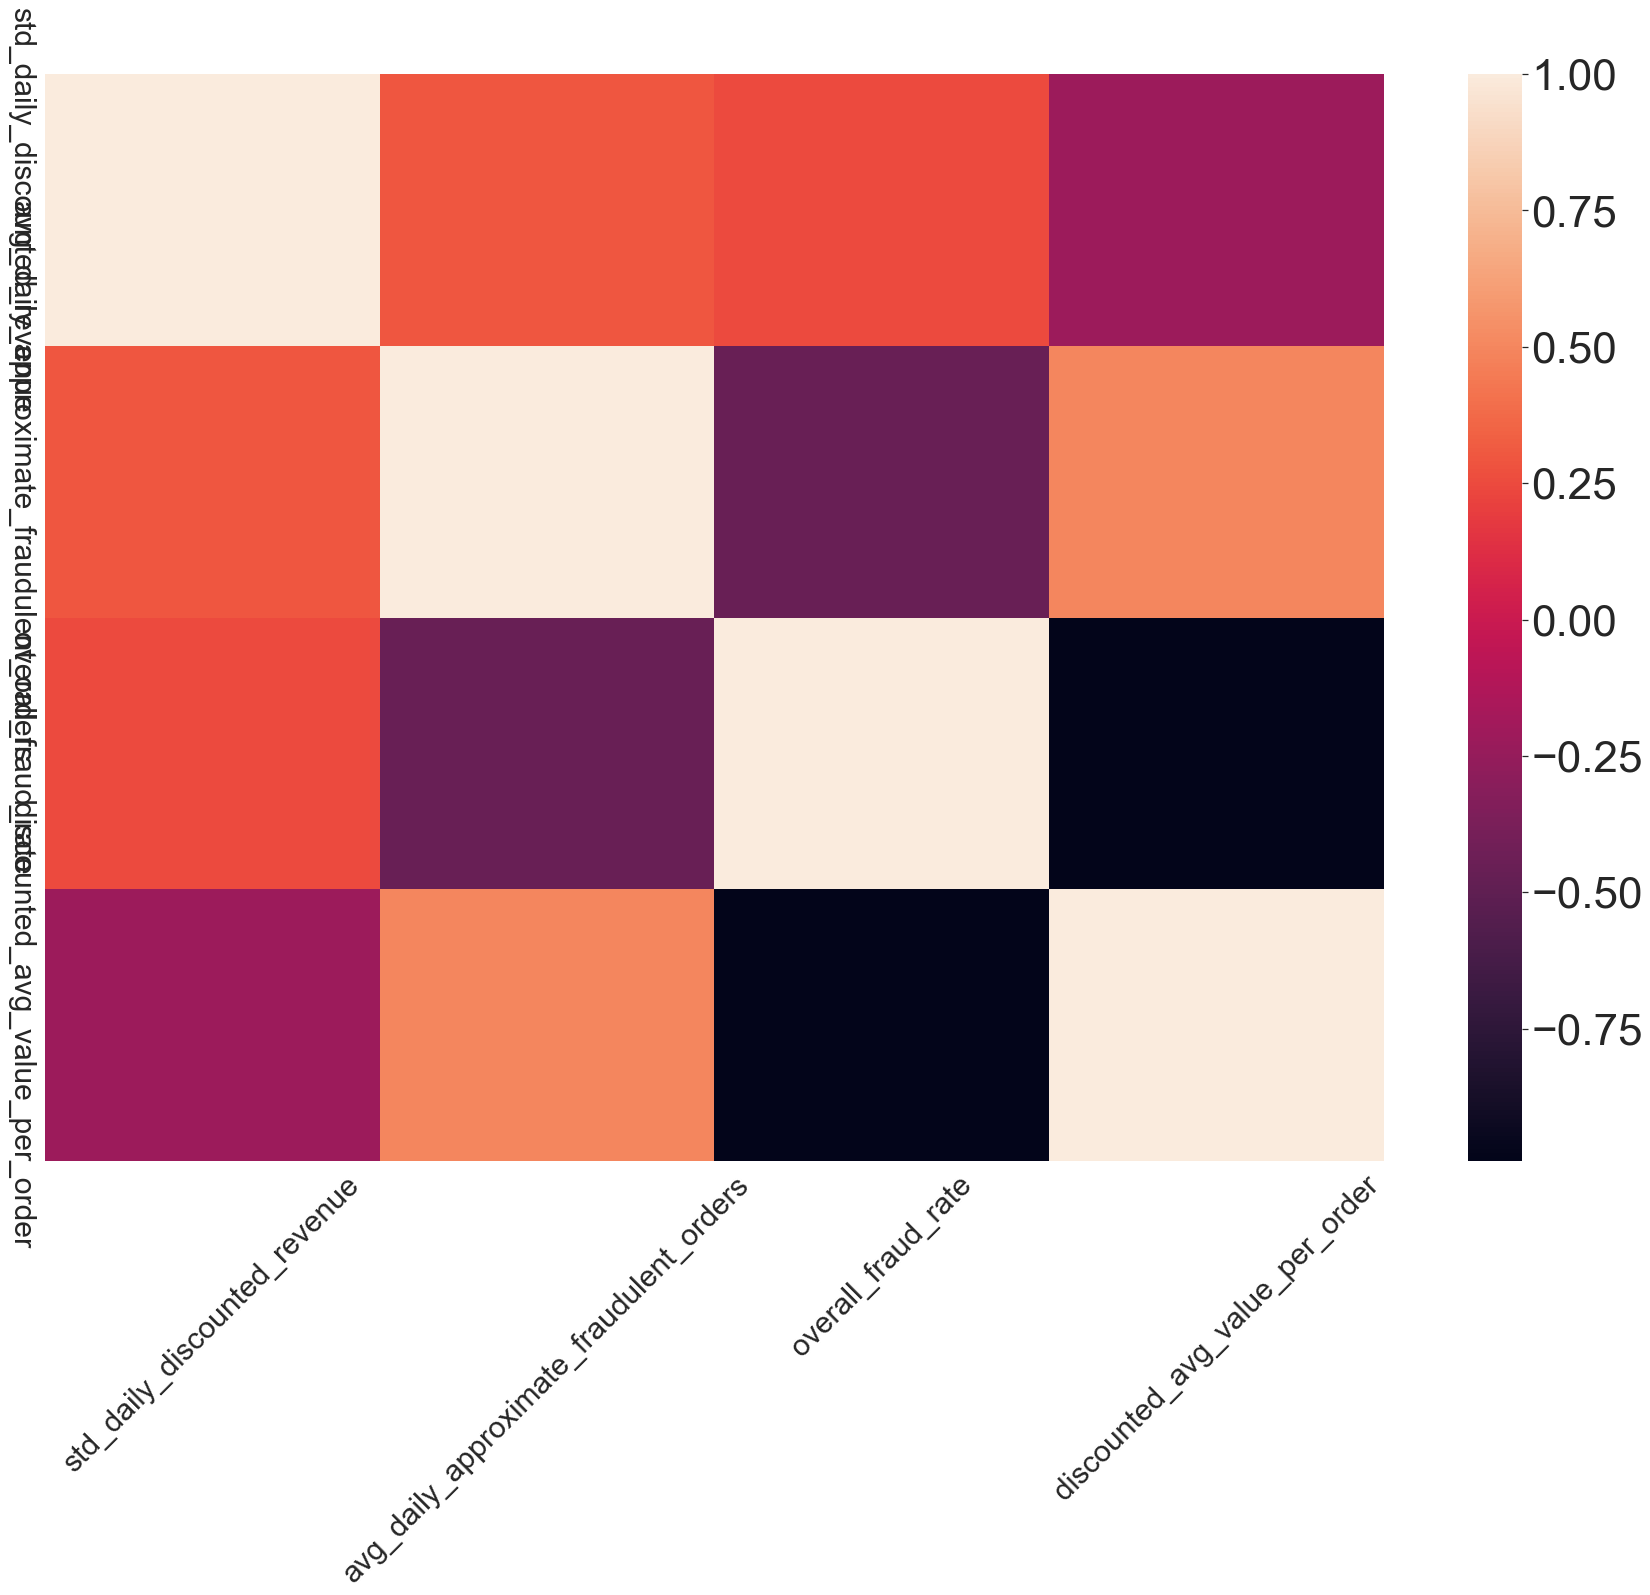

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
fraud_cor = ['std_daily_discounted_revenue', 'avg_daily_approximate_fraudulent_orders', 'overall_fraud_rate','discounted_avg_value_per_order']

fraud_df = merchant_df[fraud_cor]

corr = fraud_df.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

sns.axes_style("white")
sns.set(font_scale=4)
# plt.title('Correlation Matrix', fontsize=50)
# sns.heatmap(corr,mask = mask)
sns.heatmap(corr)
sns.set(rc = {'figure.figsize':(30,20)})
# sns.set_xticklabels(sns.get_xticklabels(), rotation=45)
ax.tick_params(axis='x', rotation=45,labelsize=30)
ax.tick_params(axis='y',rotation=0, labelsize=30)
# ax2.tick_params(axis='y',labelsize=20)

plt.savefig("../correlation_matrix_heat_map",bbox_inches="tight")
